# Visualization of the FALL3D output

## Importing modules and packages

First, we are going to import the required packages:
* numpy: for mathematical operations
* xarray: for working with labelled multi-dimensional arrays
* matplotlib: for plotting
* cartopy: for creating maps
* os: for manipulating path and filenames

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os

## Plotting on a map

Define a projection:

* Equidistant cylindrical projection: a simple projection which maps meridians to vertical straight lines of constant spacing (for meridional intervals of constant spacing), and circles of latitude to horizontal straight lines of constant spacing (for constant intervals of parallels).
* Lambert Conformal Conic projection: one of the best projections for middle latitudes with an east–west orientation. It can use a single latitude line as its point of contact (a tangent line), or the cone can intersect the earth's surface along two lines, called secants. Along these two lines there is no distortion, but distortion does occur as the distance from the secants increases.

![Lambert Conformal Conic](figures/image002.gif)


/home/lmingari/.local/lib/python3.8/site-packages/cartopy/mpl/ticker.py:476: MatplotlibDeprecationWarning: MaxNLocator.set_params got an unexpected parameter: dms
  MaxNLocator.set_params(self, **kwargs)


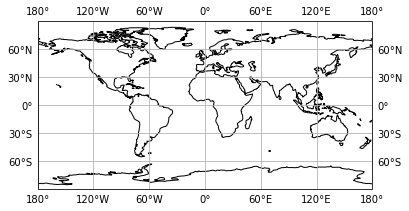

In [2]:
#Define an equidistant cylindrical projection
prj_ec  = ccrs.PlateCarree()

ax = plt.axes(projection=prj_ec)
ax.gridlines(draw_labels=True)
ax.coastlines()

In [ ]:
#Define a Lambert Conformal Conic projection
prj_lcc = ccrs.LambertConformal(central_longitude  = -45.0, 
                                central_latitude   = -40.0, 
                                standard_parallels = (-40,-40), 
                                cutoff             = 30
                               )

ax = plt.axes(projection=prj_lcc)
ax.gridlines(draw_labels=True)
ax.coastlines()

In [ ]:
ax = plt.axes(projection=prj_lcc)
ax.gridlines(draw_labels=True)
ax.coastlines()

lons = [-170., 60.]
lats = [-40., 10.]

ax.plot(lons, lats,
        color='blue', 
        linestyle='--',
        transform=prj_ce,
       )

In [ ]:
P1, P2 = prj_lcc.transform_points(prj_ce,np.array(lons),np.array(lats))
x = [P1[0],P2[0]]
y = [P1[1],P2[1]]

In [ ]:
ax.plot(x, y,
        color='red', 
        linestyle='-',
        transform=prj_lcc,
       )
ax.get_figure()

## Opening the output netCDF file

Define the path and the filename of the netCDF file and open it as a dataset:

In [ ]:
path   = "."
fname  = "puyehue-2011-regional.res.nc"
ncfile = os.path.join(path,fname)
ds     = xr.open_dataset(ncfile)

Print fields and global attributes:

In [ ]:
print(ds.keys())

Opening another file, e.g., ERA5 data:

In [ ]:
path   = "."
fname  = "puyehue-2011-global.era5pl.0p5deg.nc"
ncfile = os.path.join(path,fname)
ds_met = xr.open_dataset(ncfile)

## Selecting variables

In [ ]:
var = ds.COL_MASS
print(var)

You can see that `var` has assigned coordinate variables (lon, lat, and time) and some attributes with information. For example, in this case the column mass is stored in grams per meter square ($g\,m^{-2}$).

Next, select the variable you are interested in. For instance, the `COL_MASS` variable here:

In [ ]:
col_mass = var.sel(time='2011-6-6 18:00')

You can retrieve global attributes with:

In [ ]:
latmin = ds.attrs['LATMIN']
latmax = ds.attrs['LATMAX']
lonmin = ds.attrs['LONMIN']
lonmax = ds.attrs['LONMAX']
extent = [ lonmin, lonmax, latmin, latmax ]

In [ ]:
z = ds_met.z.sel(time='2011-6-6 18:00', level=225)/9.81

## Contours on a map

In [ ]:
ax = plt.axes(projection=prj_ce)
ax.coastlines()
ax.gridlines(draw_labels=True)
col_mass.plot.contourf(ax=ax, 
                       vmin=0, 
                       vmax=50,
                       levels=15,
                      )

In [ ]:
z.plot.contour(ax=ax, levels=8)
ax.get_figure()

In [ ]:
ax.set_extent(extent, crs=prj_ce)
ax.get_figure()

In [ ]:
ax = plt.axes(projection=prj_lcc)
ax.coastlines()
ax.gridlines(draw_labels=True)
col_mass.plot.contourf(ax=ax, 
                       transform=prj_ce, 
                       vmin=0, 
                       vmax=50
                      )

In [ ]:
ax = plt.axes(projection=prj_lcc)
ax.coastlines()
ax.gridlines(draw_labels=True)



levels= np.logspace(-1,2,num=11)

col_mass.plot.contourf(ax        = ax, 
#                       vmin      = 0.1, 
#                       vmax      = 100, 
                       transform = prj_ce, 
                       levels    = levels,
                       cmap      = 'viridis',
                       #extend    = 'max',
                      )

In [ ]:
z.plot.contour(ax=ax, 
               transform=prj_ce, 
               levels=8
              )
ax.get_figure()

In [ ]:
ax.set_extent(extent, crs=prj_ce)
ax.gridlines(draw_labels=True)
ax.get_figure()

## Contour Raster Mode
Raster contours are created by individually assigning colors to the elements of a 2D array of rectangular cells. 
Raster fill can be much faster.

In [ ]:
ax = plt.axes(projection=prj_ce)
ax.coastlines()
ax.gridlines(draw_labels=True)

col_mass.plot.pcolormesh(ax   = ax, 
                         vmin = 0.1, 
                         vmax = 100,
                        )

In [ ]:
#Creating a logarithmic scale colormap
import matplotlib.colors as colors
vmin  = 0.1
vmax  = 100
norms = colors.LogNorm(vmin=vmin, vmax=vmax)

#Remove negative a zeros values
col_mass.values[col_mass.values<vmin] = vmin

In [ ]:
ax = plt.axes(projection=prj_ec)
ax.coastlines()
ax.gridlines(draw_labels=True)

col_mass.plot.pcolormesh(ax   = ax, 
                         norm = norms,
                         cmap = 'viridis',
                        )

In [ ]:
ax = plt.axes(projection=prj_ec)
ax.coastlines()
ax.gridlines(draw_labels=True)

c=col_mass.plot.imshow(ax   = ax, 
                     norm = norms,
                     cmap = 'viridis',
                    )
#ax.set_extent([-70,-68,-36,-34], crs=prj_ce)

## Performance

In [ ]:
%%time

ax = plt.axes(projection=prj_ec)
ax.coastlines()
ax.gridlines(draw_labels=True)

path = "native"
show_colorbar = True
for i in range(len(ds.time)):
    col_mass = var.isel(time=i)
    contour  = col_mass.plot.contourf(ax=ax, 
                                      vmin=0, 
                                      vmax=50,
                                      add_colorbar=show_colorbar,
                                     )
    show_colorbar = False
    fname = "{timestep:03d}.png".format(timestep=i)
    plt.savefig(os.path.join(path,fname))
    for coll in contour.collections:
        coll.remove()
    del contour

In [ ]:
%%time

ax = plt.axes(projection=prj_lcc)
ax.coastlines()
ax.gridlines(draw_labels=True)

path = "lambert"
show_colorbar = True
for i in range(len(ds.time)):
    col_mass = var.isel(time=i)
    contour  = col_mass.plot.contourf(ax=ax, 
                                      transform=prj_ce, 
                                      vmin=0, 
                                      vmax=50,
                                      add_colorbar=show_colorbar,
                                     )
    show_colorbar = False
    fname = "{timestep:03d}.png".format(timestep=i)
    plt.savefig(os.path.join(path,fname))
    for coll in contour.collections:
        coll.remove()
    del contour

In [ ]:
%%time

ax = plt.axes(projection=prj_ec)
ax.coastlines()
ax.gridlines(draw_labels=True)

path = "raster"
show_colorbar = True
for i in range(len(ds.time)):
    col_mass = var.isel(time=i)
    contour  = col_mass.plot.pcolormesh(ax=ax, 
                                        vmin=0, 
                                        vmax=50,
                                        add_colorbar=show_colorbar,
                                       )
    show_colorbar = False
    fname = "{timestep:03d}.png".format(timestep=i)
    plt.savefig(os.path.join(path,fname))
    contour.remove()
    del contour

In [ ]:
%%time

ax = plt.axes(projection=prj_ec)
ax.coastlines()
ax.gridlines(draw_labels=True)

path = "imshow"
show_colorbar = True
for i in range(len(ds.time)):
    col_mass = var.isel(time=i)
    contour  = col_mass.plot.imshow(ax=ax, 
                                    vmin=0, 
                                    vmax=50,
                                    add_colorbar=show_colorbar,
                                   )
    show_colorbar = False
    fname = "{timestep:03d}.png".format(timestep=i)
    plt.savefig(os.path.join(path,fname))
    contour.remove()
    del contour

## Closing files

In [ ]:
ds.close()

In [ ]:
ds_met.close()